In [1]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
import sys
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm 

from sklearn.svm import SVR

import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
N = 60#int(input())
#train = np.empty(N)
#train_lab = np.chararray(N)
#for i in range(N):
    #train_lab[i], train[i] = input().strip().split()
train_df = pd.read_csv("input.txt", header=None, sep=" ", names = ["month","passengers"])

In [4]:
test = [1563178,1312558,1312558,1388316,1325942,1312550,587396,1293945,1061128,590392,1092215,1446327]

In [5]:
train_df.head()

,month,passengers
0,MonthNum_1,1226800
1,MonthNum_2,926891
2,MonthNum_3,782725
3,MonthNum_4,1023038
4,MonthNum_5,1126293


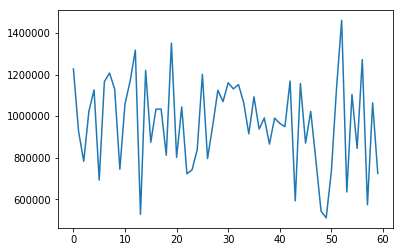

In [6]:
train_df.passengers.plot()

In [7]:
rm = train_df.passengers.rolling(window=12).mean()

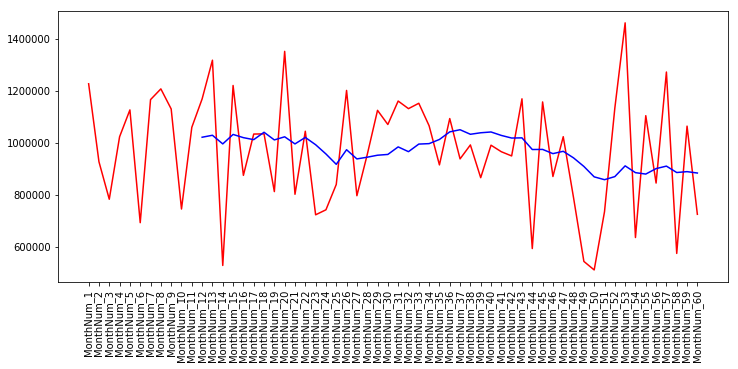

In [8]:
plt.figure(figsize=[12,5])
plt.plot(train_df.month,train_df.passengers,"r",
        train_df.month,rm,"b")
plt.xticks(rotation='vertical')
pass

In [9]:
train = np.array(train_df.passengers)

In [10]:
train

array([1226800,  926891,  782725, 1023038, 1126293,  692565, 1165880,
       1207156, 1129954,  745100, 1059346, 1168555, 1317458,  528045,
       1220238,  874557, 1033389, 1034165,  812094, 1351419,  801822,
       1044266,  722871,  742100,  839471, 1201199,  796265,  953887,
       1124602, 1070181, 1160366, 1131150, 1151813, 1065316,  914800,
       1093034,  937898,  991612,  865649,  990565,  965414,  949248,
       1168905,  593112, 1156922,  870095, 1023262,  788327,  543605,
        510786,  734714, 1133025, 1461091,  635481, 1104107,  844960,
       1271967,  574319, 1063900,  724737])

In [11]:
X0 = range(1,len(train)+1)
X = sm.add_constant(X0) 

In [12]:
X.shape

(60, 2)

In [13]:
model = sm.OLS(train,X)

In [14]:
res = model.fit()

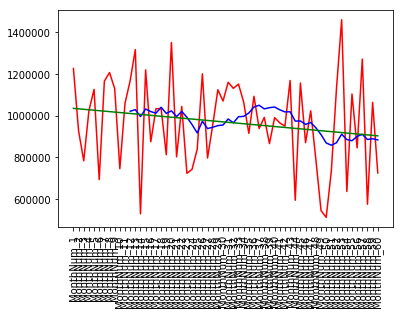

In [15]:
plt.plot(train_df.month,train_df.passengers,"r",
        train_df.month,rm,"b",
        res.predict(),'g')
plt.xticks(rotation='vertical')
pass

In [16]:
res.predict()[-1]

903001.340437159

In [59]:
clf = SVR(kernel="rbf")

In [39]:
X_train0 = np.array(range(1,N+1))
X_train=X_train0.reshape(X_train0.shape[0],1)

In [60]:
clf.fit(X_train,train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
X = X_train
y = train

In [51]:
def hackerTest(pred, expec):
    error = np.sum(np.abs(pred-expec)/expec)
    return(error)

In [78]:
from sklearn.model_selection import KFold

C_param_range = [1e1,5e1,1e2,5e2,1e3]
acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

kf = KFold(n_splits=len(C_param_range), random_state=42)
j = 0
for train_index, test_index in kf.split(X):
    print("index: ", j)
    C = C_param_range[j]
    # Apply logistic regression model to training data
    lr = SVR(kernel="rbf",C=C)
    lr.fit(X[train_index],y[train_index])
    
    # Predict using model
    y_pred = lr.predict(X[test_index])
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = hackerTest(y[test_index],y_pred)
    j += 1
    
    
C_best = float(acc_table.loc[acc_table.Accuracy == max(acc_table.Accuracy),"C_parameter"])
print("finished C")
gamma_param_range = [1e0,1e-1,1e-2]
gamma_table = pd.DataFrame(columns = ['gamma_parameter','Accuracy'])
gamma_table['gamma_parameter'] = gamma_param_range

kf = KFold(n_splits=len(gamma_param_range), random_state=42)
j = 0
for train_index, test_index in kf.split(X):
    print("index: ", j)
    gamma = gamma_param_range[j]
    print(gamma)
    # Apply logistic regression model to training data
    lr = SVR(kernel="rbf", C=C_best, gamma = gamma)
    lr.fit(X[train_index],y[train_index])
    
    # Predict using model
    y_pred = lr.predict(X[test_index])
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = hackerTest(y[test_index],y_pred)
    j += 1

index:  0
index:  1
index:  2
index:  3
index:  4
finished C
index:  0
1.0
index:  1
0.1
index:  2
0.01


In [76]:
acc_table

,C_parameter,Accuracy
0,10.0,4.11032
1,50.0,2.4711
2,100.0,4.64368
3,500.0,1.60384
4,1000.0,3.43161


In [77]:
gamma_table

,gamma_parameter,Accuracy
0,1.00,NaN
1,0.10,NaN
2,0.01,NaN


In [80]:
clf_best = SVR(kernel="rbf",C=C_best)
clf_best.fit(X,y)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

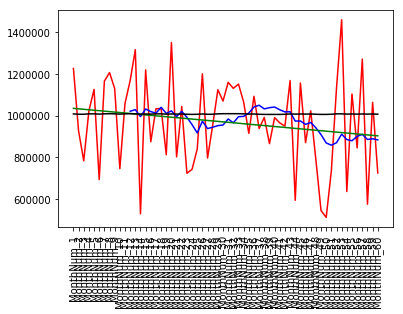

In [81]:
plt.plot(train_df.month,train_df.passengers,"r",
        train_df.month,rm,"b",
        res.predict(),'g',
         clf_best.predict(X_train),'k')
plt.xticks(rotation='vertical')
pass

In [82]:
from sklearn.ensemble import RandomForestRegressor

/home/robin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [83]:
model_rf = RandomForestRegressor()
model_rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

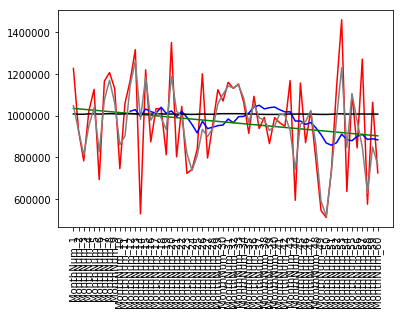

In [84]:
plt.plot(train_df.month,train_df.passengers,"r",
        train_df.month,rm,"b",
        res.predict(),'g',
         clf_best.predict(X_train),'k',
        model_rf.predict(X_train),'grey')
plt.xticks(rotation='vertical')
pass

In [24]:
X_test0 = np.array(range(N+1,N+13))
X_test = X_test0.reshape(X_test0.shape[0],1)
X_test

array([[61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72]])

In [85]:
clfpredict = clf_best.predict(X_test)
model_rf_predict = model_rf.predict(X_test)

In [27]:
T = 12

def armaforcast(data, P=2, D=1, Q=1):
    model = ARIMA(data, order=(P,D,Q))
    model_fit = model.fit(disp=False)
    yhat = model_fit.forecast()[0]
    return yhat

In [28]:

def olsforcast(data):
    X = range(1,len(data)+1)
    X = sm.add_constant(X)
    model = sm.OLS(data,X)
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict()[-1]
    return yhat

In [30]:
seendata1 = [x for x in train]
seendata2 = [x for x in train]

predicted1 = list()
predicted2 = list()

for i in range(T):
    yhat1 = armaforcast(seendata1, P=2, D=1,Q=1)
    yhat2 = olsforcast(seendata2)
    predicted1.append(yhat1)
    predicted2.append(yhat2)
    print(yhat1, yhat2)
    seendata1.append(yhat1)
    seendata2.append(yhat2)

[954537.68008435] 903001.340437159
[874220.66284908] 900905.9244806428
[909491.78809063] 898811.5814457646
[892438.13651758] 896718.2772715184
[896954.04246031] 894625.9794935096
[891845.72094183] 892534.6571457007
[891067.99242542] 890444.2806696006
[888457.07397923] 888354.8218302315
[886558.67109137] 886266.2536382806
[884113.63233646] 884178.5502778785
[881981.25564456] 882091.687039552
[879943.94643571] 880005.6402578932


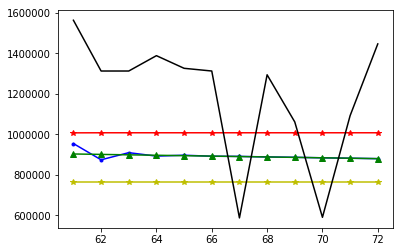

In [86]:
plt.plot(X_test, predicted1, 'b.-')
plt.plot(X_test, predicted2, 'g^-')
plt.plot(X_test, clfpredict,'r*-')
plt.plot(X_test, model_rf_predict,'y*-')
plt.plot(X_test, test, 'k')